In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/Sinhala_news_articles.csv')

In [3]:
data.head()

,Title,Label
0,කොරෝනා වැලඳුණු ට්‍රම්ප් අද ජන රැලියක,International
1,ආර්ථික විද්‍යාව පිළිබඳ නොබෙල් ත්‍යාගය ඇමරිකානු...,International
2,ඉන්දියාවේ කොරෝනා ආසාදිතයන් 71 ලක්ෂය ඉක්මවයි,International
3,කළු ජාතිකයෙකු ඩොලර් මිලියනයක වන්දි ඉල්ලා ටෙක්ස...,International
4,නේපාල සංචාරක ඇමතිට කොරෝනා,International


## Data Preprocessing

In [4]:
data.shape

(26420, 2)

In [5]:
data.duplicated().sum()

796

In [6]:
data = data.drop_duplicates()

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(25624, 2)

In [9]:
data.isnull().sum()

Title    0
Label    0
dtype: int64

In [10]:
data.Label.value_counts()

Label
International    11880
Sport             8928
Business          4816
Name: count, dtype: int64

<AxesSubplot: ylabel='count'>

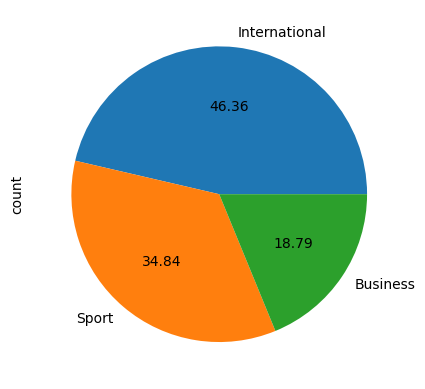

In [11]:
data.Label.value_counts().plot.pie(autopct='%.2f')

### Text Preprocessing

In [12]:
import re
import string

In [13]:
data["Title"].head(5)

0                 කොරෝනා වැලඳුණු ට්‍රම්ප් අද ජන රැලියක
1    ආර්ථික විද්‍යාව පිළිබඳ නොබෙල් ත්‍යාගය ඇමරිකානු...
2          ඉන්දියාවේ කොරෝනා ආසාදිතයන් 71 ලක්ෂය ඉක්මවයි
3    කළු ජාතිකයෙකු ඩොලර් මිලියනයක වන්දි ඉල්ලා ටෙක්ස...
4                            නේපාල සංචාරක ඇමතිට කොරෝනා
Name: Title, dtype: object

remove links

In [14]:
data["Title"] = data['Title'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [15]:
data["Title"].head(20)

0                  කොරෝනා වැලඳුණු ට්‍රම්ප් අද ජන රැලියක
1     ආර්ථික විද්‍යාව පිළිබඳ නොබෙල් ත්‍යාගය ඇමරිකානු...
2           ඉන්දියාවේ කොරෝනා ආසාදිතයන් 71 ලක්ෂය ඉක්මවයි
3     කළු ජාතිකයෙකු ඩොලර් මිලියනයක වන්දි ඉල්ලා ටෙක්ස...
4                             නේපාල සංචාරක ඇමතිට කොරෝනා
5     උතුරු කොරියාව ලොව විශාලතම බැලස්ටික් මිසයිලය ප්...
6         තායිලන්තයේ බස් රථ අනතුරකින් විසිදෙනෙකු මියයයි
7         බ්‍රසීලයේ කොරෝනා මරණ එක්ලක්ෂ පනස් දහස ඉක්මවයි
8                   නොබෙල් සාම ත්‍යාගයට ට්‍රම්ප්ගේ නමත්
9     ඉන්දු - චීන දේශසීමාවට චීනය 60^000ක අමතර සෙබළුන...
10    රුසියාවෙන් වාර්තා වූ වැඩිම ආසාදිතයින් සංඛ්‍යාව...
11      කොරෝනා ප්‍රතිකාර නැවතූ බව^ ජනපති ට්‍රම්ප් කියයි
12       දකුණු කොරියාවේ මහල් 33 ක ගොඩනැගිල්ලක් ගිනි ගනී
13                 රුපියල^ ඩොලරයට සාපේකෂව ශක්තිමත් වෙයි
14    කොවිඩ් වැළඳුණු ට්‍රම්ප්^ බයිඩ්න් සමඟ මුහුණට මු...
15                          යුරෝපයේ කොරෝනා පැතිරීම ඉහළට
16    ආවරණ මැද කෙරුණු ඇමරිකානු උප ජනපති අපේක්ෂකයන්ගේ...
17          ජපානය රටවල් 12 ක විදෙස් ගමන් තහනම ඉව

Remove punctuations

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["Title"] = data["Title"].apply(remove_punctuations)

In [18]:
data["Title"].head(20)

0                  කොරෝනා වැලඳුණු ට්‍රම්ප් අද ජන රැලියක
1     ආර්ථික විද්‍යාව පිළිබඳ නොබෙල් ත්‍යාගය ඇමරිකානු...
2           ඉන්දියාවේ කොරෝනා ආසාදිතයන් 71 ලක්ෂය ඉක්මවයි
3     කළු ජාතිකයෙකු ඩොලර් මිලියනයක වන්දි ඉල්ලා ටෙක්ස...
4                             නේපාල සංචාරක ඇමතිට කොරෝනා
5     උතුරු කොරියාව ලොව විශාලතම බැලස්ටික් මිසයිලය ප්...
6         තායිලන්තයේ බස් රථ අනතුරකින් විසිදෙනෙකු මියයයි
7         බ්‍රසීලයේ කොරෝනා මරණ එක්ලක්ෂ පනස් දහස ඉක්මවයි
8                   නොබෙල් සාම ත්‍යාගයට ට්‍රම්ප්ගේ නමත්
9     ඉන්දු  චීන දේශසීමාවට චීනය 60000ක අමතර සෙබළුන් ...
10    රුසියාවෙන් වාර්තා වූ වැඩිම ආසාදිතයින් සංඛ්‍යාව...
11       කොරෝනා ප්‍රතිකාර නැවතූ බව ජනපති ට්‍රම්ප් කියයි
12       දකුණු කොරියාවේ මහල් 33 ක ගොඩනැගිල්ලක් ගිනි ගනී
13                  රුපියල ඩොලරයට සාපේකෂව ශක්තිමත් වෙයි
14    කොවිඩ් වැළඳුණු ට්‍රම්ප් බයිඩ්න් සමඟ මුහුණට මුහ...
15                          යුරෝපයේ කොරෝනා පැතිරීම ඉහළට
16    ආවරණ මැද කෙරුණු ඇමරිකානු උප ජනපති අපේක්ෂකයන්ගේ...
17          ජපානය රටවල් 12 ක විදෙස් ගමන් තහනම ඉව

remove numbers

In [19]:
data["Title"] = data['Title'].str.replace('\d+', '', regex=True)

In [20]:
data["Title"].head(20)

0                  කොරෝනා වැලඳුණු ට්‍රම්ප් අද ජන රැලියක
1     ආර්ථික විද්‍යාව පිළිබඳ නොබෙල් ත්‍යාගය ඇමරිකානු...
2             ඉන්දියාවේ කොරෝනා ආසාදිතයන්  ලක්ෂය ඉක්මවයි
3     කළු ජාතිකයෙකු ඩොලර් මිලියනයක වන්දි ඉල්ලා ටෙක්ස...
4                             නේපාල සංචාරක ඇමතිට කොරෝනා
5     උතුරු කොරියාව ලොව විශාලතම බැලස්ටික් මිසයිලය ප්...
6         තායිලන්තයේ බස් රථ අනතුරකින් විසිදෙනෙකු මියයයි
7         බ්‍රසීලයේ කොරෝනා මරණ එක්ලක්ෂ පනස් දහස ඉක්මවයි
8                   නොබෙල් සාම ත්‍යාගයට ට්‍රම්ප්ගේ නමත්
9     ඉන්දු  චීන දේශසීමාවට චීනය ක අමතර සෙබළුන් යොදවා...
10    රුසියාවෙන් වාර්තා වූ වැඩිම ආසාදිතයින් සංඛ්‍යාව...
11       කොරෝනා ප්‍රතිකාර නැවතූ බව ජනපති ට්‍රම්ප් කියයි
12         දකුණු කොරියාවේ මහල්  ක ගොඩනැගිල්ලක් ගිනි ගනී
13                  රුපියල ඩොලරයට සාපේකෂව ශක්තිමත් වෙයි
14    කොවිඩ් වැළඳුණු ට්‍රම්ප් බයිඩ්න් සමඟ මුහුණට මුහ...
15                          යුරෝපයේ කොරෝනා පැතිරීම ඉහළට
16    ආවරණ මැද කෙරුණු ඇමරිකානු උප ජනපති අපේක්ෂකයන්ගේ...
17            ජපානය රටවල්  ක විදෙස් ගමන් තහනම ඉව

remove stopwords

In [21]:
#!pip install nltk

In [22]:
import nltk

In [23]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
with open('../static/model/corpora/stopwords/sinhala', 'r', encoding='utf-8') as file:
    sw = file.read().splitlines()

In [25]:
sw

['සහ',
 'සමග',
 'සමඟ',
 'අහා',
 'ආහ්',
 'ආ',
 'ඕහෝ',
 'අනේ',
 'අඳෝ',
 'අපොයි',
 'අපෝ',
 'අයියෝ',
 'ආයි',
 'ඌයි',
 'චී',
 'චිහ්',
 'චික්',
 'හෝ\u200d',
 'දෝ',
 'දෝහෝ',
 'මෙන්',
 'සේ',
 'වැනි',
 'බඳු',
 'වන්',
 'අයුරු',
 'අයුරින්',
 'ලෙස',
 'වැඩි',
 'ශ්\u200dරී',
 'හා',
 'ය',
 'නිසා',
 'නිසාවෙන්',
 'බවට',
 'බව',
 'බවෙන්',
 'නම්',
 'වැඩි',
 'සිට',
 'දී',
 'මහා',
 'මහ',
 'පමණ',
 'පමණින්',
 'පමන',
 'වන',
 'විට',
 'විටින්',
 'මේ',
 'මෙලෙස',
 'මෙයින්',
 'ඇති',
 'ලෙස',
 'සිදු',
 'වශයෙන්',
 'යන',
 'සඳහා',
 'මගින්',
 'හෝ\u200d',
 'ඉතා',
 'ඒ',
 'එම',
 'ද',
 'අතර',
 'විසින්',
 'සමග',
 'පිළිබඳව',
 'පිළිබඳ',
 'තුළ',
 'බව',
 'වැනි',
 'මහ',
 'මෙම',
 'මෙහි',
 'මේ',
 'වෙත',
 'වෙතින්',
 'වෙතට',
 'වෙනුවෙන්',
 'වෙනුවට',
 'වෙන',
 'ගැන',
 'නෑ',
 'අනුව',
 'නව',
 'පිළිබඳ',
 'විශේෂ',
 'දැනට',
 'එහෙන්',
 'මෙහෙන්',
 'එහේ',
 'මෙහේ',
 'ම',
 'තවත්',
 'තව ',
 'සහ',
 'දක්වා',
 'ට',
 'ගේ',
 'එ',
 'ක',
 'ක්',
 'බවත්',
 'බවද',
 'මත',
 'ඇතුලු',
 'ඇතුළු',
 'මෙසේ',
 'වඩා',
 'වඩාත්ම',
 'නිති',
 'නිතිත්',
 'නිතොර',
 'නිතර',
 

In [26]:
data["Title"].head(20)

0                  කොරෝනා වැලඳුණු ට්‍රම්ප් අද ජන රැලියක
1     ආර්ථික විද්‍යාව පිළිබඳ නොබෙල් ත්‍යාගය ඇමරිකානු...
2             ඉන්දියාවේ කොරෝනා ආසාදිතයන්  ලක්ෂය ඉක්මවයි
3     කළු ජාතිකයෙකු ඩොලර් මිලියනයක වන්දි ඉල්ලා ටෙක්ස...
4                             නේපාල සංචාරක ඇමතිට කොරෝනා
5     උතුරු කොරියාව ලොව විශාලතම බැලස්ටික් මිසයිලය ප්...
6         තායිලන්තයේ බස් රථ අනතුරකින් විසිදෙනෙකු මියයයි
7         බ්‍රසීලයේ කොරෝනා මරණ එක්ලක්ෂ පනස් දහස ඉක්මවයි
8                   නොබෙල් සාම ත්‍යාගයට ට්‍රම්ප්ගේ නමත්
9     ඉන්දු  චීන දේශසීමාවට චීනය ක අමතර සෙබළුන් යොදවා...
10    රුසියාවෙන් වාර්තා වූ වැඩිම ආසාදිතයින් සංඛ්‍යාව...
11       කොරෝනා ප්‍රතිකාර නැවතූ බව ජනපති ට්‍රම්ප් කියයි
12         දකුණු කොරියාවේ මහල්  ක ගොඩනැගිල්ලක් ගිනි ගනී
13                  රුපියල ඩොලරයට සාපේකෂව ශක්තිමත් වෙයි
14    කොවිඩ් වැළඳුණු ට්‍රම්ප් බයිඩ්න් සමඟ මුහුණට මුහ...
15                          යුරෝපයේ කොරෝනා පැතිරීම ඉහළට
16    ආවරණ මැද කෙරුණු ඇමරිකානු උප ජනපති අපේක්ෂකයන්ගේ...
17            ජපානය රටවල්  ක විදෙස් ගමන් තහනම ඉව

In [27]:
data["Title"] = data["Title"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [28]:
data["Title"].head(20)

0                  කොරෝනා වැලඳුණු ට්‍රම්ප් අද ජන රැලියක
1     ආර්ථික විද්‍යාව නොබෙල් ත්‍යාගය ඇමරිකානුවන් දෙද...
2              ඉන්දියාවේ කොරෝනා ආසාදිතයන් ලක්ෂය ඉක්මවයි
3     කළු ජාතිකයෙකු ඩොලර් මිලියනයක වන්දි ඉල්ලා ටෙක්ස...
4                             නේපාල සංචාරක ඇමතිට කොරෝනා
5     උතුරු කොරියාව ලොව විශාලතම බැලස්ටික් මිසයිලය ප්...
6         තායිලන්තයේ බස් රථ අනතුරකින් විසිදෙනෙකු මියයයි
7         බ්‍රසීලයේ කොරෝනා මරණ එක්ලක්ෂ පනස් දහස ඉක්මවයි
8                   නොබෙල් සාම ත්‍යාගයට ට්‍රම්ප්ගේ නමත්
9     ඉන්දු චීන දේශසීමාවට චීනය අමතර සෙබළුන් යොදවා චෝදනා
10    රුසියාවෙන් වාර්තා වූ වැඩිම ආසාදිතයින් සංඛ්‍යාව...
11          කොරෝනා ප්‍රතිකාර නැවතූ ජනපති ට්‍රම්ප් කියයි
12            දකුණු කොරියාවේ මහල් ගොඩනැගිල්ලක් ගිනි ගනී
13                  රුපියල ඩොලරයට සාපේකෂව ශක්තිමත් වෙයි
14    කොවිඩ් වැළඳුණු ට්‍රම්ප් බයිඩ්න් මුහුණට මුහුණ ව...
15                          යුරෝපයේ කොරෝනා පැතිරීම ඉහළට
16    ආවරණ මැද කෙරුණු ඇමරිකානු උප ජනපති අපේක්ෂකයන්ගේ...
17               ජපානය රටවල් විදෙස් ගමන් තහනම ඉව

Stemming

In [29]:
with open('../static/model/stem_dictionary.txt', 'r', encoding='utf-8') as file:
    sd = file.read().splitlines()

In [30]:
sd

['අංකද\tඅංක',
 'අංකය\tඅංක',
 'අංකයක්\tඅංක',
 'අංකයට\tඅංක',
 'අංකයටද\tඅංක',
 'අංකයන්ට\tඅංක',
 'අංකයන්ටද\tඅංක',
 'අංකවල\tඅංක',
 'අංකවලට\tඅංක',
 'අංකවලින්\tඅංක',
 'අංගණයට\tඅංගණය',
 'අංගණයේ\tඅංගණය',
 'අංගනය\tඅංගන',
 'අංගනයක\tඅංගන',
 'අංගනයක්\tඅංගන',
 'අංගයක්\tඅංගය',
 'අංගවලින්\tඅංගවල',
 'අංගොඩට\tඅංගොඩ',
 'අංගෝපාංගයන්\tඅංගෝපාංග',
 'අංශභාගය\tඅංශභාග',
 'අංශයකට\tඅංශය',
 'අංශයකම\tඅංශය',
 'අංශයක්\tඅංශය',
 'අංශයකින්\tඅංශය',
 'අංශයකින්ම\tඅංශය',
 'අංශයට\tඅංශය',
 'අංශයටත්\tඅංශය',
 'අංශයටද\tඅංශය',
 'අංශයන්\tඅංශය',
 'අංශයන්ගෙන්\tඅංශය',
 'අංශයන්ගේ\tඅංශය',
 'අංශයන්හි\tඅංශය',
 'අංශයෙන්\tඅංශය',
 'අංශයෙන්ද\tඅංශය',
 'අංශවලට\tඅංශවල',
 'අංශවලින්\tඅංශවල',
 'අකටයුත්තකට\tඅකටයුත්ත',
 'අකටයුත්තක්\tඅකටයුත්ත',
 'අකටයුතුකම්වලට\tඅකටයුතුකම්',
 'අකටයුතුකම්වලින්\tඅකටයුතුකම්',
 'අකණ්ඩව\tඅකණ්ඩ',
 'අකමැත්තක්\tඅකමැත්ත',
 'අකමැත්තකින්\tඅකමැත්ත',
 'අකමැත්තද\tඅකමැත්ත',
 'අකමැත්තෙන්\tඅකමැත්ත',
 'අකමැතිවී\tඅකමැතිව',
 'අකමැතිවීම\tඅකමැතිව',
 'අකමැතිවූ\tඅකමැතිව',
 'අකරතැබ්බය\tඅකරතැබ්බ',
 'අකර්මණ්යය\tඅකර්මණ්ය',
 'අකලංකගේ\tඅකලංක',
 'අ

In [31]:
Dict = {}
for row in sd:
  word = row.split('\t')
  Dict[word[0]] = word[1]

In [32]:
Dict

{'අංකද': 'අංක',
 'අංකය': 'අංක',
 'අංකයක්': 'අංක',
 'අංකයට': 'අංක',
 'අංකයටද': 'අංක',
 'අංකයන්ට': 'අංක',
 'අංකයන්ටද': 'අංක',
 'අංකවල': 'අංක',
 'අංකවලට': 'අංක',
 'අංකවලින්': 'අංක',
 'අංගණයට': 'අංගණය',
 'අංගණයේ': 'අංගණය',
 'අංගනය': 'අංගන',
 'අංගනයක': 'අංගන',
 'අංගනයක්': 'අංගන',
 'අංගයක්': 'අංගය',
 'අංගවලින්': 'අංගවල',
 'අංගොඩට': 'අංගොඩ',
 'අංගෝපාංගයන්': 'අංගෝපාංග',
 'අංශභාගය': 'අංශභාග',
 'අංශයකට': 'අංශය',
 'අංශයකම': 'අංශය',
 'අංශයක්': 'අංශය',
 'අංශයකින්': 'අංශය',
 'අංශයකින්ම': 'අංශය',
 'අංශයට': 'අංශය',
 'අංශයටත්': 'අංශය',
 'අංශයටද': 'අංශය',
 'අංශයන්': 'අංශය',
 'අංශයන්ගෙන්': 'අංශය',
 'අංශයන්ගේ': 'අංශය',
 'අංශයන්හි': 'අංශය',
 'අංශයෙන්': 'අංශය',
 'අංශයෙන්ද': 'අංශය',
 'අංශවලට': 'අංශවල',
 'අංශවලින්': 'අංශවල',
 'අකටයුත්තකට': 'අකටයුත්ත',
 'අකටයුත්තක්': 'අකටයුත්ත',
 'අකටයුතුකම්වලට': 'අකටයුතුකම්',
 'අකටයුතුකම්වලින්': 'අකටයුතුකම්',
 'අකණ්ඩව': 'අකණ්ඩ',
 'අකමැත්තක්': 'අකමැත්ත',
 'අකමැත්තකින්': 'අකමැත්ත',
 'අකමැත්තද': 'අකමැත්ත',
 'අකමැත්තෙන්': 'අකමැත්ත',
 'අකමැතිවී': 'අකමැතිව',
 'අකමැතිවීම': 'අකමැතිව'

In [33]:
def stemming(text):
    for word in Dict:
        text = text.replace(word, Dict[word])
    return text

data["Title"] = data["Title"].apply(stemming)

In [34]:
data["Title"].head(20)

0                    කොරෝනා වැලඳණු ට්‍රම්ප් අද ජන රැලික
1     ආර්ථික විද්‍යාව නොබෙල් ත්‍යාගය ඇමරිකාවන් දෙදෙනෙකු
2               ඉන්දියාව කොරෝනා ආසාදිතයන් ලක්ෂය ඉක්මවයි
3     කළු ජාතිකයෙකු ඩොලර මිලියනයක වන්දි ඉල්ලා ටෙක්සා...
4                             නේපාල සංචාරක ඇමතිට කොරෝනා
5     උතුරු කොරියාව ලොව විශාලත බැලස්ටික් මිසයිල ප්‍ර...
6          තායිලන්තේ බස් රථ අනතුරකින් විසිදෙනෙකු මියයයි
7         බ්‍රසීලයේ කොරෝනා මරණ එක්ලක්ෂ පනස් දහස ඉක්මවයි
8                   නොබෙල් සාම ත්‍යාගයට ට්‍රම්ප්ගේ නමත්
9         ඉන්දු චීන දේශසීමව චීනය අමතර සෙබළු යොදවා චෝදනා
10    රුසියාවෙන් වාර්තා වූ වැඩිම ආසාදිතයින් සංඛ්‍යාව...
11          කොරෝනා ප්‍රතිකාර නැවතූ ජනපති ට්‍රම්ප් කියයි
12             දකුණු කොරියාවේ මහල් ගොඩනැගිල්ක් ගිනි ගනී
13                   රුපියල ඩොලරට සාපේකෂව ශක්තිමත් වෙයි
14    කොවිඩ් වැළඳුණ ට්‍රම්ප් බයිඩ්න් මුහුණට මුහුණ වි...
15                            යුරෝපය කොරෝනා පැතිරී ඉහළට
16    ආවරණ මැද කෙරුණු ඇමරිකා උප ජනපති අපේක්ෂකගේ විවා...
17                ජපාන රටවල් විදෙස් ගමන් තහනම ඉව

In [37]:
'''
from nltk.stem import PorterStemmer
ps = PorterStemmer()

data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))
data["tweet"].head()
'''

'\nfrom nltk.stem import PorterStemmer\nps = PorterStemmer()\n\ndata["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))\ndata["tweet"].head()\n'

In [36]:
data

,Title,Label
0,කොරෝනා වැලඳණු ට්‍රම්ප් අද ජන රැලික,International
1,ආර්ථික විද්‍යාව නොබෙල් ත්‍යාගය ඇමරිකාවන් දෙදෙනෙකු,International
2,ඉන්දියාව කොරෝනා ආසාදිතයන් ලක්ෂය ඉක්මවයි,International
3,කළු ජාතිකයෙකු ඩොලර මිලියනයක වන්දි ඉල්ලා ටෙක්සා...,International
4,නේපාල සංචාරක ඇමතිට කොරෝනා,International
...,...,...
26415,එක්දින ලංකා සංචිත කෙරේ,Sport
26416,ආබාධ ක්‍රීඩකය් දෙනෙකුට හෙට තරඟ අහිමි කරයි,Sport
26417,ලංකා ඕස්ට්‍රේලියා තරඟ හෙට,Sport
26418,බංග්ලාදේශ පාකිස්ථායට,Sport


### Building Vacabulary

In [39]:
from collections import Counter
vocab = Counter()

In [41]:
vocab

Counter()

In [42]:
for sentence in data['Title']:
    vocab.update(sentence.split())

In [43]:
vocab

Counter({'කොරෝනා': 250,
         'වැලඳණු': 1,
         'ට්\u200dරම්ප්': 368,
         'අද': 852,
         'ජන': 14,
         'රැලික': 1,
         'ආර්ථික': 123,
         'විද්\u200dයාව': 5,
         'නොබෙල්': 19,
         'ත්\u200dයාගය': 13,
         'ඇමරිකාවන්': 14,
         'දෙදෙනෙකු': 113,
         'ඉන්දියාව': 1339,
         'ආසාදිතයන්': 47,
         'ලක්ෂය': 12,
         'ඉක්මවයි': 76,
         'කළු': 43,
         'ජාතිකයෙකු': 13,
         'ඩොලර': 181,
         'මිලියනයක': 14,
         'වන්දි': 22,
         'ඉල්ලා': 116,
         'ටෙක්සාස්': 10,
         'පොලීසියට': 9,
         'එරෙහි': 349,
         'නඩු': 33,
         'පවරයි': 9,
         'නේපාල': 43,
         'සංචාරක': 100,
         'ඇමතිට': 13,
         'උතුරු': 459,
         'කොරියාව': 355,
         'ලොව': 254,
         'විශාලත': 42,
         'බැලස්ටික්': 4,
         'මිසයිල': 122,
         'ප්\u200dරදර්ශනය': 18,
         'කරයි': 926,
         'තායිලන්තේ': 40,
         'බස්': 122,
         'රථ': 111,
         'අනතුරකින්': 126,

In [44]:
len(vocab)

18928

In [45]:
data.shape

(25624, 2)

In [47]:
tokens = [key for key in vocab if vocab[key] > 10]

In [48]:
tokens

['කොරෝනා',
 'ට්\u200dරම්ප්',
 'අද',
 'ජන',
 'ආර්ථික',
 'නොබෙල්',
 'ත්\u200dයාගය',
 'ඇමරිකාවන්',
 'දෙදෙනෙකු',
 'ඉන්දියාව',
 'ආසාදිතයන්',
 'ලක්ෂය',
 'ඉක්මවයි',
 'කළු',
 'ජාතිකයෙකු',
 'ඩොලර',
 'මිලියනයක',
 'වන්දි',
 'ඉල්ලා',
 'එරෙහි',
 'නඩු',
 'නේපාල',
 'සංචාරක',
 'ඇමතිට',
 'උතුරු',
 'කොරියාව',
 'ලොව',
 'විශාලත',
 'මිසයිල',
 'ප්\u200dරදර්ශනය',
 'කරයි',
 'තායිලන්තේ',
 'බස්',
 'රථ',
 'අනතුරකින්',
 'මියයයි',
 'බ්\u200dරසීලයේ',
 'මරණ',
 'සාම',
 'ට්\u200dරම්ප්ගේ',
 'ඉන්දු',
 'චීන',
 'දේශසීමව',
 'චීනය',
 'අමතර',
 'සෙබළු',
 'චෝදනා',
 'රුසියාවෙන්',
 'වාර්තා',
 'වූ',
 'වැඩිම',
 'ආසාදිතයින්',
 'සංඛ්\u200dයාව',
 'පැය',
 'විසි',
 'හතරේ',
 'ජනපති',
 'කියයි',
 'දකුණු',
 'කොරියාවේ',
 'මහල්',
 'ගොඩනැගිල්ක්',
 'ගිනි',
 'ගනී',
 'රුපියල',
 'ශක්තිමත්',
 'වෙයි',
 'කොවිඩ්',
 'මුහුණ',
 'ඉල්ලයි',
 'යුරෝපය',
 'ඉහළට',
 'මැද',
 'ඇමරිකා',
 'උප',
 'උණුසුම',
 'ජපාන',
 'රටවල්',
 'විදෙස්',
 'ගමන්',
 'තහනම',
 'ඉවත්',
 'ඉරාන',
 'යළි',
 'වසා',
 'දැමේ',
 'චීනයේ',
 'රාජ්\u200dය',
 'ලක්ෂ',
 'නික්ෙයි',
 'වීඩියෝ',
 'වෛද්\u200dය

In [49]:
len(tokens)

2340

In [51]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset 

In [62]:
X = data['tweet']
y = data['label']

In [66]:
#!pip install scikit-learn

  Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl (8.3 MB)
  Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl (42.5 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
X_train

131     dear blackberri occasion best fruit fall tree ...
923     wow fuck appl put new p code ipad lock go put ...
4944    cute set iphon case luvocraci iphon appl case ...
3201     cant get music ipod sweet fantast amaz ipod appl
7828    happi kiggi cat pet smile appl shotoniphon iph...
                              ...                        
3005    natur california indesign appl color colombia ...
3018    man best friend germanshepherdpuppi southampto...
7697    “jaijuiceandcaf mmmmmm happi pineappl mint app...
5747    im psychic next email ill receiv head icloud s...
2611              ericcanona skm haha thought hahahahahah
Name: tweet, Length: 6336, dtype: object

In [81]:
X_test

474     … link bio apparel everyth els use code blackf...
3508    download free dg app iphon … iphon free cheat ...
3292    love combo instap samsung nailart colorclub we...
2151    comic iphon new transform prequel comicbook ap...
3758    rome cittàitali iphon instafood infoodwetrust ...
                              ...                        
4347    appl iphon leather case smart appl iphon style...
1233    dantreaci ive galaxi remov im stuck ipad inste...
6624    liter sing new iphon surpris shove ass asshol ...
2291    belat birthday gift alway best birthday gift a...
5907    iphon iv last past year half due mainli break ...
Name: tweet, Length: 1584, dtype: object

In [79]:
y_train

131     0
923     1
4944    0
3201    1
7828    0
       ..
3005    0
3018    0
7697    0
5747    0
2611    1
Name: label, Length: 6336, dtype: int64

### Vectorization 

In [82]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [83]:
vectorized_x_train = vectorizer(X_train, tokens)

In [87]:
vectorized_x_test = vectorizer(X_test, tokens)

In [88]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [89]:
y_train

131     0
923     1
4944    0
3201    1
7828    0
       ..
3005    0
3018    0
7697    0
5747    0
2611    1
Name: label, Length: 6336, dtype: int64

In [90]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [91]:
y_test

474     0
3508    0
3292    0
2151    0
3758    0
       ..
4347    0
1233    1
6624    1
2291    0
5907    1
Name: label, Length: 1584, dtype: int64

In [92]:
y_train.value_counts()

label
0    4714
1    1622
Name: count, dtype: int64

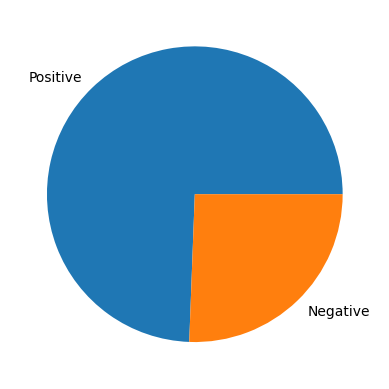

In [93]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset 

In [95]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)


In [96]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9428, 1145) (9428,)


In [97]:
y_train_smote.value_counts()

label
0    4714
1    4714
Name: count, dtype: int64

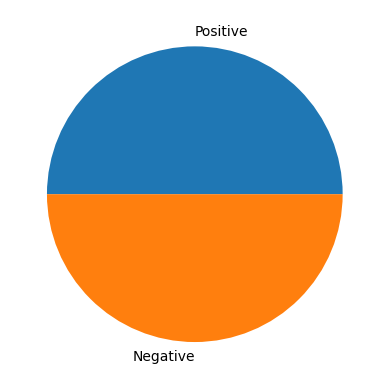

In [98]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [103]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [104]:
y_train_smote

0       0
1       1
2       0
3       1
4       0
       ..
9423    1
9424    1
9425    1
9426    1
9427    1
Name: label, Length: 9428, dtype: int64

In [105]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [106]:
y_test

474     0
3508    0
3292    0
2151    0
3758    0
       ..
4347    0
1233    1
6624    1
2291    0
5907    1
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation 

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [108]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression 

In [118]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.918
	Recall = 0.966
	F1-Score = 0.941
Testing Scores:
	Accuracy = 0.871
	Precision = 0.703
	Recall = 0.851
	F1-Score = 0.77


### Naive Bayes 

In [119]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.908
	Precision = 0.872
	Recall = 0.956
	F1-Score = 0.912
Testing Scores:
	Accuracy = 0.86
	Precision = 0.663
	Recall = 0.923
	F1-Score = 0.771


### Decision Tree 

In [120]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.825
	Precision = 0.65
	Recall = 0.681
	F1-Score = 0.665


### Random Forest 

In [121]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.865
	Precision = 0.744
	Recall = 0.718
	F1-Score = 0.73


### Support Vector Machine 

In [122]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.98
	Precision = 0.964
	Recall = 0.996
	F1-Score = 0.98
Testing Scores:
	Accuracy = 0.876
	Precision = 0.726
	Recall = 0.827
	F1-Score = 0.773


In [126]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)